<h1 align="center">Inference with Diffusers Library</h1> 

This code is copied from https://github.com/huggingface/diffusers/tree/main/examples/textual_inversion
 
## Training

For training run the following code in your terminal. Note that this code requires a source install of the diffusers library (see diffusers repo for more details).

```
accelerate config

huggingface-cli login

accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --train_data_dir="data/selfies" \
  --learnable_property="object" \
  --placeholder_token="<CHRIS>" --initializer_token="person" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=1000 \
  --learning_rate=5.0e-04 --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="data/textual_inversion/selfies"
```

## Inference

In [82]:
import torch
from diffusers import StableDiffusionPipeline, PNDMScheduler
import matplotlib.pyplot as plt

model_id = "data/textual_inversion/chris"
pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16).to("cuda")
pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)

/home/chris/miniconda3/envs/diffusers/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


100%|██████████| 50/50 [00:03<00:00, 15.63it/s]


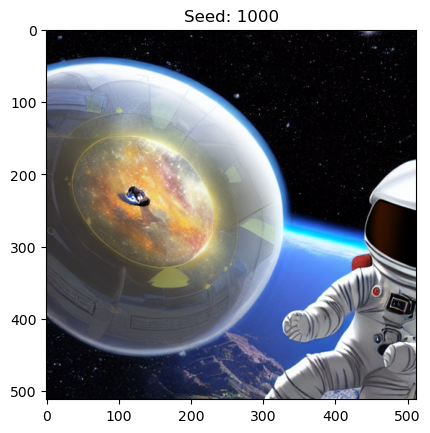

100%|██████████| 50/50 [00:03<00:00, 15.19it/s]


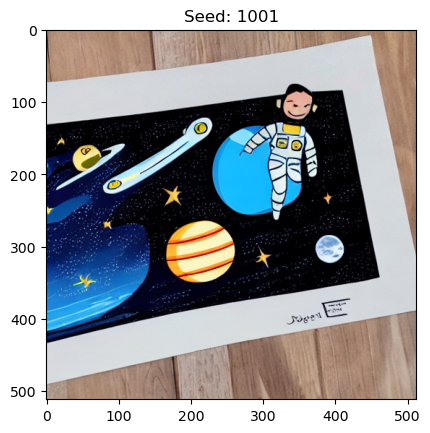

100%|██████████| 50/50 [00:03<00:00, 15.12it/s]


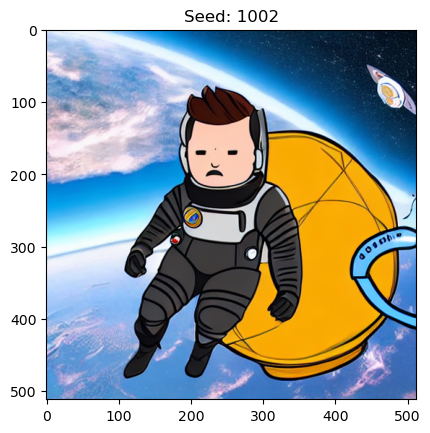

100%|██████████| 50/50 [00:03<00:00, 15.11it/s]


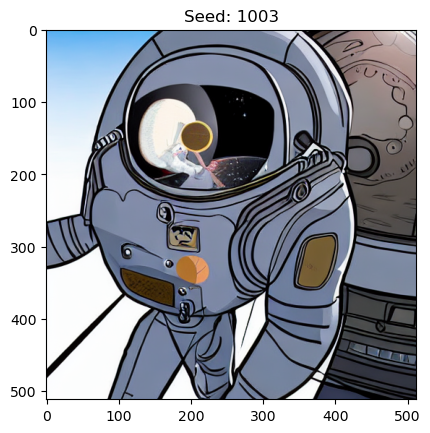

100%|██████████| 50/50 [00:03<00:00, 15.01it/s]


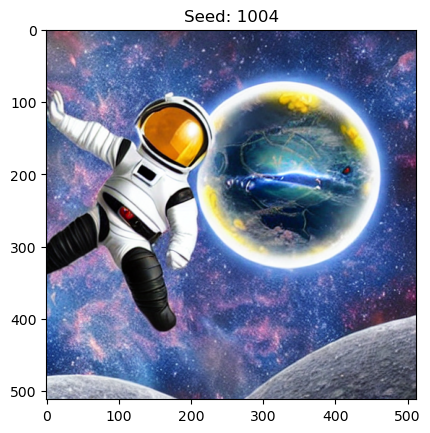

100%|██████████| 50/50 [00:03<00:00, 14.95it/s]


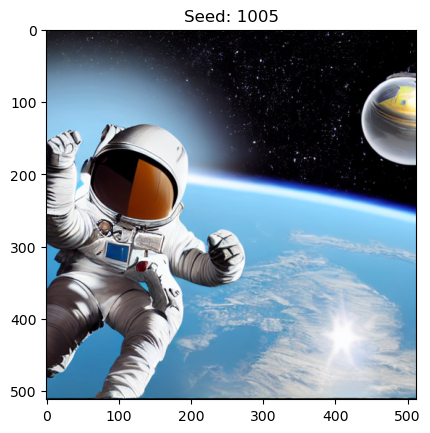

100%|██████████| 50/50 [00:03<00:00, 14.92it/s]


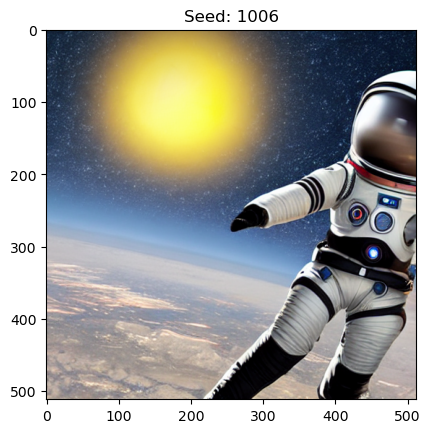

100%|██████████| 50/50 [00:03<00:00, 14.95it/s]


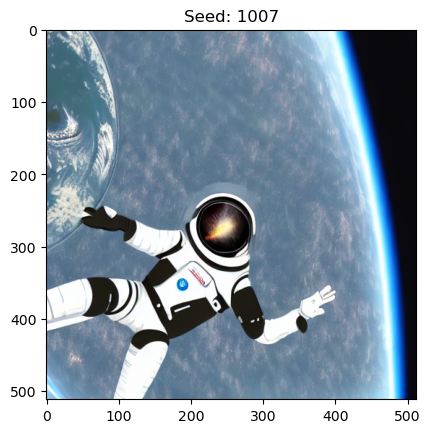

100%|██████████| 50/50 [00:03<00:00, 14.95it/s]


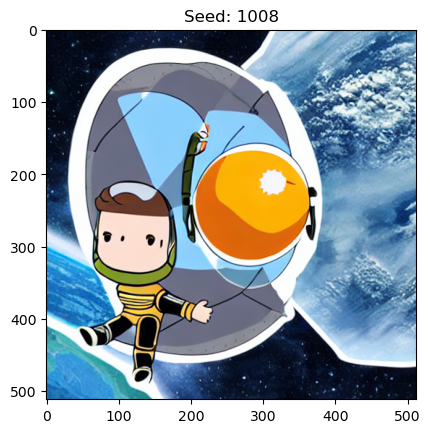

100%|██████████| 50/50 [00:03<00:00, 14.90it/s]


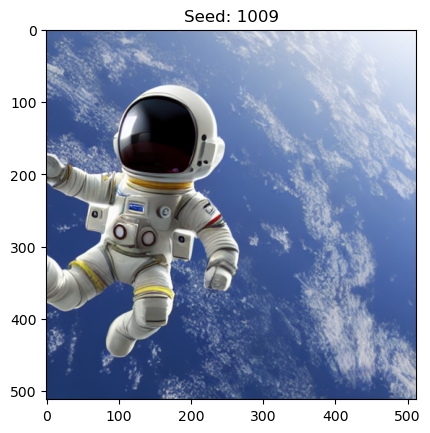

100%|██████████| 50/50 [00:03<00:00, 14.77it/s]


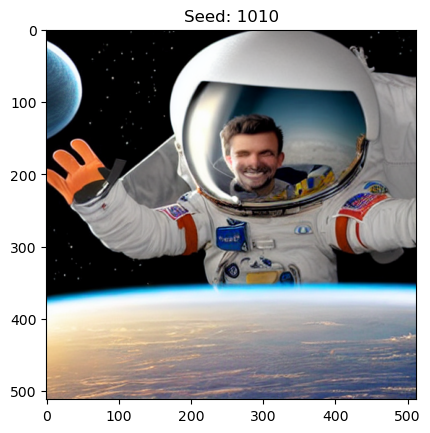

100%|██████████| 50/50 [00:03<00:00, 14.84it/s]


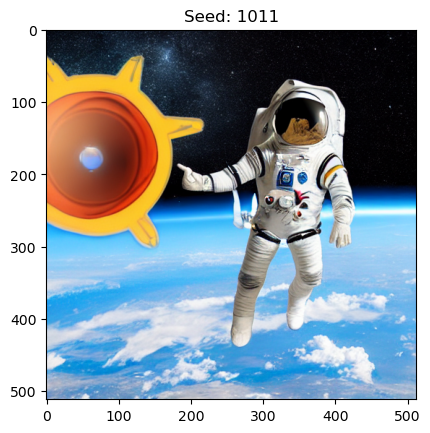

100%|██████████| 50/50 [00:03<00:00, 14.81it/s]


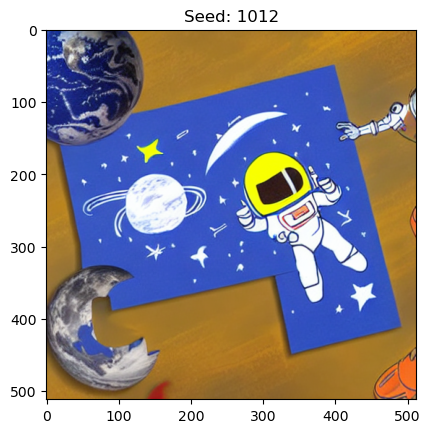

100%|██████████| 50/50 [00:03<00:00, 14.78it/s]


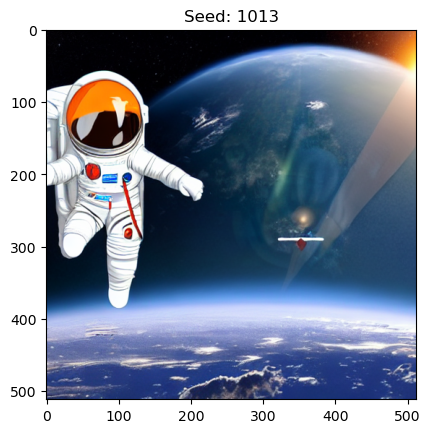

100%|██████████| 50/50 [00:03<00:00, 14.74it/s]


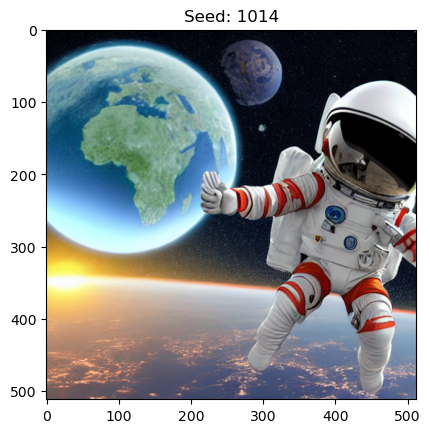

 10%|█         | 5/50 [00:00<00:03, 13.79it/s]

In [85]:
prompts, seed = "Professional portrait photo of <CHRIS>, looking away, serious eyes, slightly smiling, highly detailed, award winning photo, black and white, no background", 2
prompts, seed = "Pencil drawing of <CHRIS> dressed like a Jedi from Star Wars, wearing a hood, a red light saber in his hand, face clearly visible", 1011
prompts, seed = "Cartoon of <CHRIS> flying through space in an astronaut suit. Face clearly visible. Sun, planet Earth and stars in the background.", 1


for seed in range(1000, 1020):
    image = pipe(prompts, num_inference_steps=50, guidance_scale=7.5, generator=torch.Generator(device="cuda").manual_seed(seed), output_type="np.ndarray").images[0]
    plt.imshow(image) 
    plt.title(f"Seed: {seed}")
    plt.show()